In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.lines import Line2D
import matplotlib.animation as animation

# Logistic Map

In [4]:
x0 = 0.9
r = 2.9
# logistic equation
def step_seq(r, x_n):
    return r * x_n * (1 - x_n)

## 1. Animate Solution

<IPython.core.display.Javascript object>


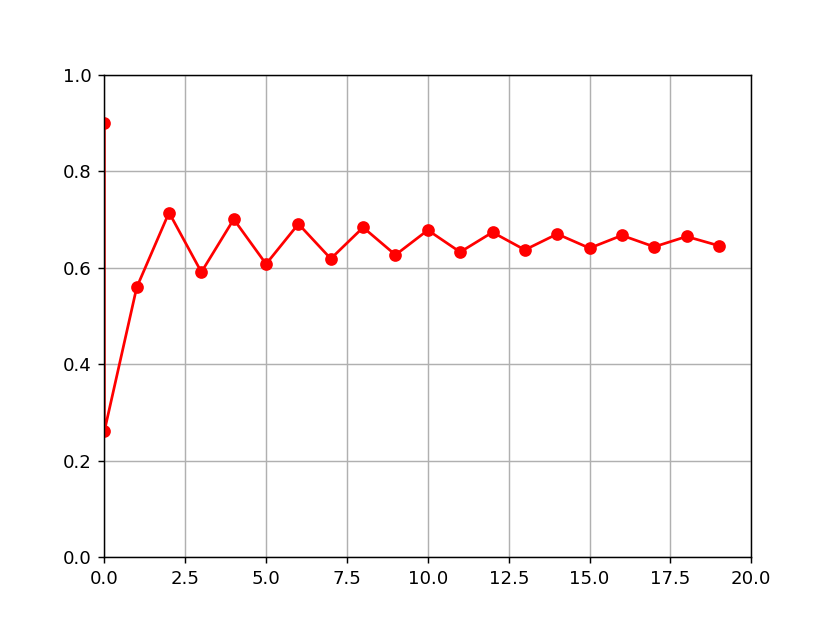

In [5]:
fig, ax = plt.subplots()
tdata = [0]
# Initial population size
xdata = [x0]

def init():
    # Set up plot
    line = Line2D(tdata, xdata, marker="o", linestyle="-", color="r")
    ax.add_line(line)
    ax.grid()
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 1)
    return ax
    
def update(frame):
    # Compute the population size at timestep t+1
    x_next = step_seq(r, xdata[-1])
    tdata.append(frame)
    xdata.append(x_next)
    ax.lines[0].set_data(tdata, xdata)
    return ax
    
FuncAnimation(fig, update, init_func=init, frames=np.arange(20), repeat=False, blit=True)

## 2. Interactive Solution
Plot the solution for a given growth rate, $r$ (bifurcation parameter) and population size, $x_0$ (initial value of state variable $x_n$). 

<IPython.core.display.Javascript object>


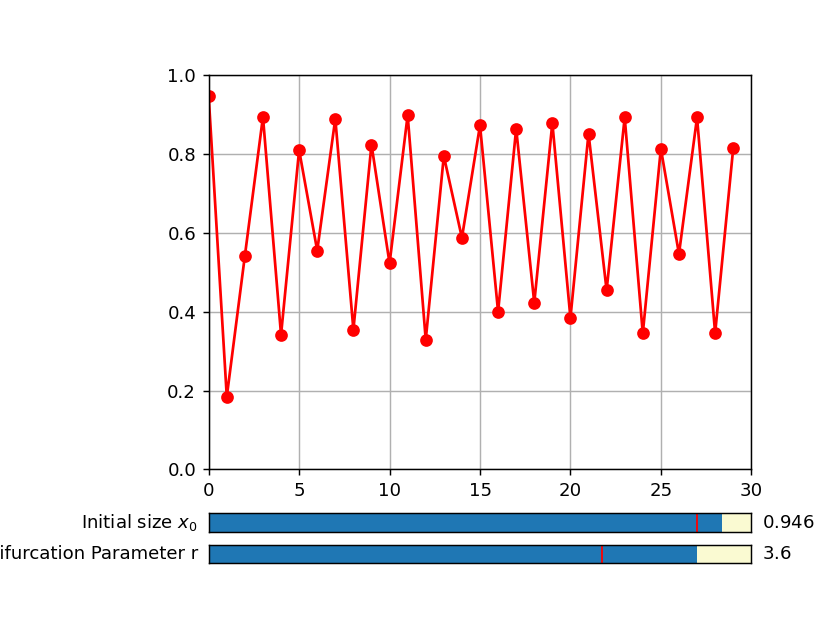

In [8]:
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
tdata = np.arange(30)
xdata = []
xn = x0
for i in range(30):
        xdata.append(xn)
        xn = step_seq(r, xn)
line = Line2D(tdata, xdata, marker="o", linestyle="-", color="r")
ax.add_line(line)
ax.grid()
ax.set_xlim(0, 30)
ax.set_ylim(0, 1)

# Slider for x_0 and r
ax_x0 = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='lightgoldenrodyellow')
ax_r = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
slider_x0 = Slider(ax_x0, "Initial size $x_0$", 0, 1, valinit=x0)
slider_r = Slider(ax_r, "Bifurcation Parameter r", 0, 4, valinit=r)


def update(val):
    xdata = []
    xn = slider_x0.val
    r = slider_r.val
    for i in range(30):
        xdata.append(xn)
        xn = step_seq(r, xn)
    line.set_ydata(xdata)
    fig.canvas.draw_idle()
    
slider_x0.on_changed(update)
slider_r.on_changed(update)

plt.show()

## 3. Approximation of the Bifurcation Diagram of the Logistic Map

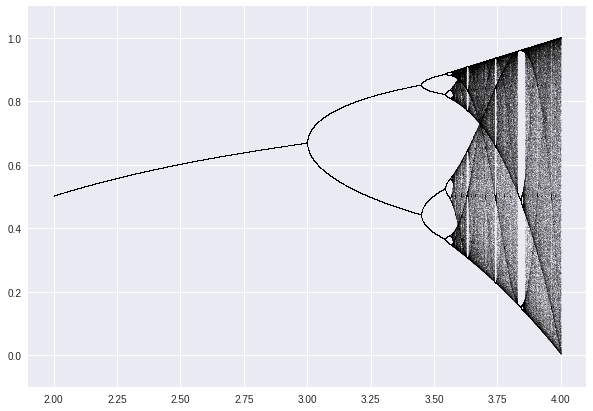

In [5]:
%matplotlib inline
plt.style.use("seaborn")
import numpy as np

def logistic(x, r):
    return x * r * (1 - x)

n = 10000
r = np.linspace(2, 4, n)
x = 1e-5 * np.ones(n)
plt.subplots(figsize=(10, 7))
# Sample values which are approached for large n, given values of r in the range [2,4]
for i in range(int(n / 10)):
    x = logistic(x, r)
    if i >= (int(n / 10 - 100)):
        # and plot them as points
        plt.plot(r, x, ",k", alpha=.1)


plt.xlim(1.9, 4.1)
plt.ylim(-0.1,1.1)
plt.show()

## 4. WORK IN PROGRESS - Animate bifurcation diagram

In [3]:
def get_period(x):
    epsilon = 0.001
    x.reverse()
    for i, el in enumerate(x[1:]):
        if (abs(el - x[0])) < epsilon:
            return x[:i+1]

<IPython.core.display.Javascript object>


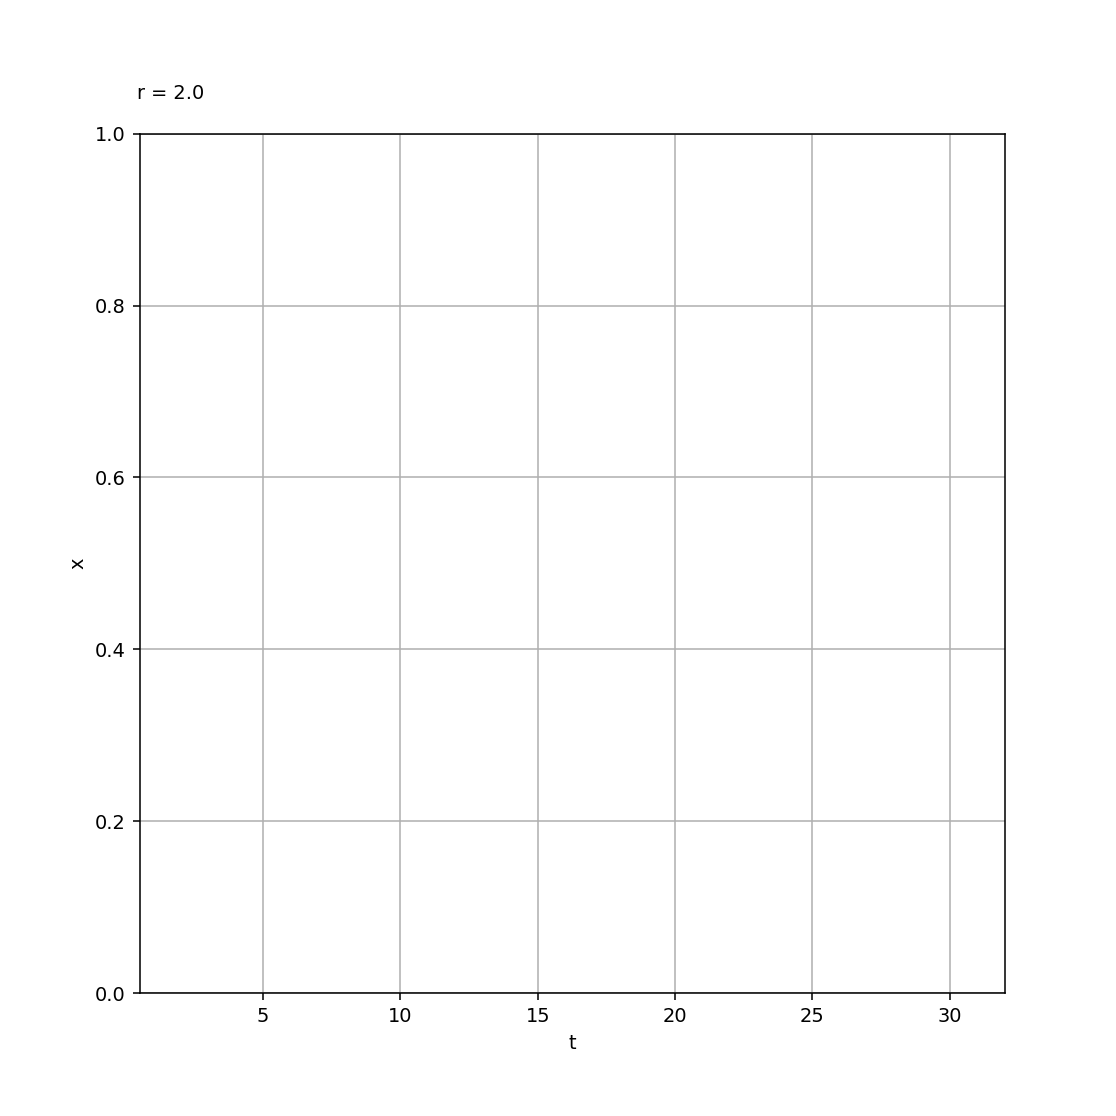

In [16]:
class BifurcationAnimation(animation.TimedAnimation):
    def __init__(self):
        self.cur = 0
        self.n = 32
        self.r = np.concatenate((np.linspace(2, 3, 20), np.linspace(3.05, 3.45, 20), np.linspace(3.456, 4, 200)))
        self.timesteps = self.n * len(self.r)
        self.tdata = [0]
        self.xdata = [x0]
        
        fig, self.ax = plt.subplots(figsize=(8,8))
        self.ax.grid()
        self.ax.set_xlabel("t")
        self.ax.set_ylabel("x")
        self.ax.set_xlim(0.5, self.n)
        self.ax.set_ylim(0, 1)
        
        #self.ax[1].set_xlim(1.9,4.1)
        
        self.text_r = self.ax.text(0.4, 1.04, f"r = {self.r[self.cur]}")
        
        self.line = self.ax.plot([], [], marker="o", linestyle="-", color="r")
        
        #self.lines = [self.ax[1].add_line(Line2D([], [], marker="o", markersize=0.2,linestyle="", color="b")) for _ in range(100)]
        
        animation.TimedAnimation.__init__(self, fig, interval=15, blit=True, repeat=False)
        
    def _draw_frame(self, frame):
        if frame % self.n == 0 and (frame != 0):
            self.text_r.set_text(f"r = {round(self.r[self.cur], 5)}")
            #for i in range(65):
            #    x_next = step_seq(self.r[self.cur], self.xdata[-1])
            #    self.xdata.append(x_next)
            #period = get_period(self.xdata)
            #breakpoint()
            #[self.lines[i].set_data(np.append(self.lines[i].get_xdata(), self.r[self.cur]), np.append(self.lines[i].get_ydata(), p)) for i, p in enumerate(period)]
            self.tdata = [0]
            self.xdata = [x0]
            self.cur += 1
        
        x_next = step_seq(self.r[self.cur], self.xdata[-1])
        self.tdata.append(frame % self.n)
        self.xdata.append(x_next)
        self.line.set_data(self.tdata, self.xdata)
        
        self._drawn_artists = [self.text_r]
        
    def new_frame_seq(self):
        return iter(range(self.timesteps))
    
    def _init_draw(self):
        self.line.set_data(self.tdata, self.xdata)
    
ani = BifurcationAnimation()
# ani.save('test_sub.mp4')
plt.show()